# Analysis notebook — Pilot user study
This notebook loads the simulated pilot dataset, performs descriptive statistics, runs confirmatory tests (t-tests), and visualises results. Replace simulated data with real collected data and re-run.


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load data
path = 'sim_user_study.csv'
df = pd.read_csv(path)
df.head()

,participant_id,condition,trial,difficulty,accuracy,response_time_s,trust_likert,confidence
0,1,static,1,hard,1,6.852950,4.69,0.56
1,1,static,2,easy,1,3.851023,3.91,0.56
2,1,static,3,easy,1,4.026666,3.26,0.62
3,1,static,4,hard,1,5.788544,3.78,0.58
4,1,static,5,easy,0,5.361207,3.52,0.42


In [3]:
# Aggregate participant-level metrics
participant = df.groupby(['participant_id','condition']).agg(
    accuracy_rate=('accuracy','mean'),
    mean_rt=('response_time_s','mean'),
    mean_trust=('trust_likert','mean'),
    mean_conf=('confidence','mean'),
    trials=('trial','count')
).reset_index()
participant.head()

,participant_id,condition,accuracy_rate,mean_rt,mean_trust,mean_conf,trials
0,1,static,0.7,5.044580,3.443,0.622,10
1,2,adaptive,0.8,4.809355,3.471,0.743,10
2,3,adaptive,0.8,4.735009,4.042,0.619,10
3,4,adaptive,0.8,5.834006,4.189,0.618,10
4,5,adaptive,0.9,5.056326,3.864,0.723,10


In [5]:
# Compare accuracy rate by condition (two-sample t-test)
adaptive = participant[participant['condition']=='adaptive']['accuracy_rate']
static = participant[participant['condition']=='static']['accuracy_rate']
print('N adaptive, static:', len(adaptive), len(static))

res = stats.ttest_ind(adaptive, static, equal_var=False)
print('t-test accuracy rate (adaptive vs static):', res)

effsize = (adaptive.mean()-static.mean()) / participant['accuracy_rate'].std()
print('Mean adaptive, static:', adaptive.mean(), static.mean())
print('Cohen d (approx):', effsize)

N adaptive, static: 42 38
t-test accuracy rate (adaptive vs static): TtestResult(statistic=np.float64(1.8571711056699876), pvalue=np.float64(0.06747587313358965), df=np.float64(70.30211755061809))
Mean adaptive, static: 0.7476190476190476 0.6815789473684211
Cohen d (approx): 0.4141377431327131


<Figure size 640x480 with 0 Axes>

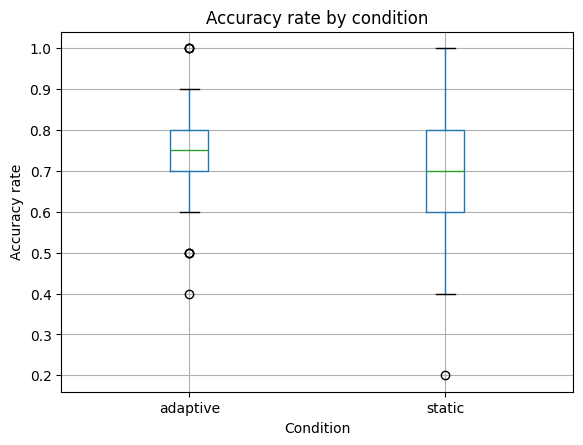

<Figure size 640x480 with 0 Axes>

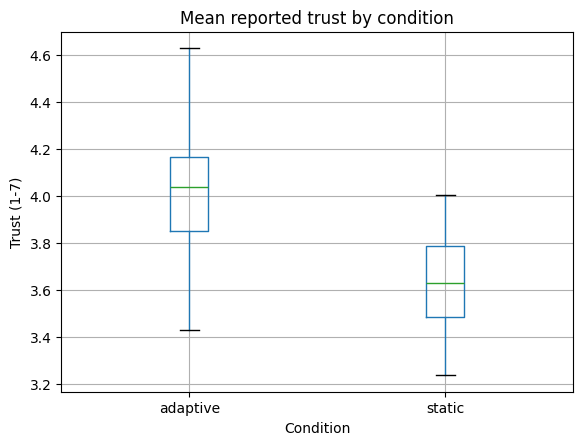

In [7]:
# Visualisation: accuracy rate and trust by condition
plt.figure()
participant.boxplot(column=['accuracy_rate'], by='condition')
plt.suptitle('')
plt.title('Accuracy rate by condition')
plt.xlabel('Condition')
plt.ylabel('Accuracy rate')
plt.show()

plt.figure()
participant.boxplot(column=['mean_trust'], by='condition')
plt.suptitle('')
plt.title('Mean reported trust by condition')
plt.xlabel('Condition')
plt.ylabel('Trust (1-7)')
plt.show()